In [4]:
!pip install opendatasets
!pip install pandas

In [5]:
import opendatasets as od
import pandas as pd

In [6]:
od.download("https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml/data")

Skipping, found downloaded files in "./synthetic-transaction-monitoring-dataset-aml" (use force=True to force download)


In [7]:
data=pd.read_csv("/content/synthetic-transaction-monitoring-dataset-aml/SAML-D.csv")

# Analyzing the Data

In [8]:
data.columns.values

array(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'], dtype=object)

In [9]:
data.dtypes

,0
Time,object
Date,object
Sender_account,int64
Receiver_account,int64
Amount,float64
Payment_currency,object
Received_currency,object
Sender_bank_location,object
Receiver_bank_location,object
Payment_type,object


In [10]:
# number of unique values \ unique types of categories in the columns
print(data['Payment_type'].nunique())
print(data['Receiver_bank_location'].nunique())
print(data['Sender_bank_location'].nunique())
print(data['Laundering_type'].nunique())

7
18
18
28


Laundering types that are predicted as laundering

In [11]:
laundering_types = data[data['Is_laundering'] == 1]['Laundering_type']

In [12]:
laundering_types.nunique()

17

These 17 categories are predicted as fraudelent

In [13]:
print(laundering_types.value_counts())

Laundering_type
Structuring             1870
Cash_Withdrawal         1334
Deposit-Send             945
Smurfing                 932
Layered_Fan_In           656
Layered_Fan_Out          529
Stacked Bipartite        506
Behavioural_Change_1     394
Bipartite                383
Cycle                    382
Fan_In                   364
Gather-Scatter           354
Behavioural_Change_2     345
Scatter-Gather           338
Single_large             250
Fan_Out                  237
Over-Invoicing            54
Name: count, dtype: int64


In [14]:
a=(data['Payment_type'].value_counts())
b=(data['Receiver_bank_location'].value_counts())
c=(data['Sender_bank_location'].value_counts())
d=(data['Laundering_type'].value_counts())

In [15]:
data.shape

(9504852, 12)

In [16]:
import matplotlib.pyplot as plt

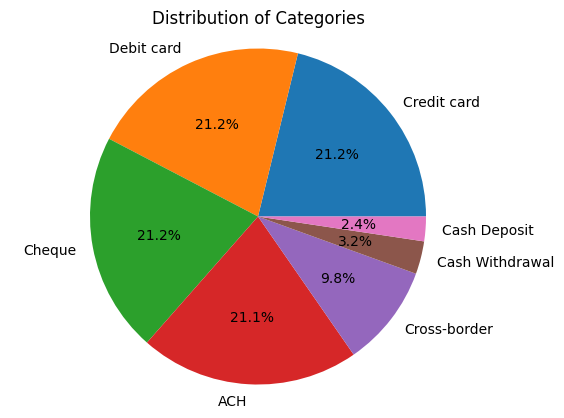

In [17]:
# Create the pie chart
plt.pie(a.values, labels=a.index, autopct='%1.1f%%')
plt.title("Distribution of Categories")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

Splitting the data by dates

In [19]:
# Define the date ranges
train_start_date = pd.to_datetime('2022-10-01')
train_end_date = pd.to_datetime('2023-05-31')
test_start_date = pd.to_datetime('2023-06-01')
test_end_date = pd.to_datetime('2023-08-31')

# Create training and testing sets
train_data = data[(data['Date'] >= train_start_date) & (data['Date'] <= train_end_date)]
test_data = data[(data['Date'] >= test_start_date) & (data['Date'] <= test_end_date)]

After we split the data , date and time are not contributing to the prediction , so we can drop them


In [20]:
train_data = train_data.drop('Date', axis=1)
test_data = test_data.drop('Date', axis=1)

In [21]:
train_data = train_data.drop('Time', axis=1)
test_data = test_data.drop('Time', axis=1)

In [22]:
print(train_data)

         Sender_account  Receiver_account    Amount Payment_currency  \
0            8724731955        2769355426   1459.15        UK pounds   
1            1491989064        8401255335   6019.64        UK pounds   
2             287305149        4404767002  14328.44        UK pounds   
3            5376652437        9600420220  11895.00        UK pounds   
4            9614186178        3803336972    115.25        UK pounds   
...                 ...               ...       ...              ...   
7048783      3073661793        2371114403   5963.04        UK pounds   
7048784      8076812096         964379261  16564.07        UK pounds   
7048785      8926250318        1619158829    236.61        UK pounds   
7048786       770422559        3913824514    218.28        UK pounds   
7048787      4613920700        9916664326   5853.56        UK pounds   

        Received_currency Sender_bank_location Receiver_bank_location  \
0               UK pounds                   UK                

In [23]:
!pip install scikit-learn

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Train - test split for data

In [25]:
X_train = train_data.drop('Is_laundering', axis=1)  # Replace 'target_variable_column' with your target variable column name
y_train = train_data['Is_laundering']
X_test = test_data.drop('Is_laundering', axis=1)
y_test = test_data['Is_laundering']

Using Ordinal Encoder because earlier used One Hot Encoding and it was causing the dataset to increase rapidly

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
encoder = OrdinalEncoder()

In [28]:
categorical_features = X_train.select_dtypes(include=['object']).columns
# Select categorical features

encoder.fit(X_train[categorical_features])

OrdinalEncoder()

In [29]:
X_train[categorical_features] = encoder.transform(X_train[categorical_features])
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

Ran the svm classifier with rbf and linear kernels , but was taking indefinite time to run

In [30]:
# Create an SVM classifier object
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model using the training data
svm_classifier.fit(X_train, y_train)

KeyboardInterrupt: 